<a href="https://colab.research.google.com/github/SAMashiyane/organophosphate_pro/blob/main/pycaret_organph_pralidoxime_v1_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for outcome</h1>
    <h3 align="center">Investigating outcome </h3>
</div>

Test for runtime system(GPU OR CPU)

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [ ]:
import logging, sys
logging.disable(sys.maxsize)

### **CLASSIFICATION FOR THIS DATA!!**

**mount in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load 

In [ ]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_final - corect -clean_class_param_end _encode.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.of.organophosphorus,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,...,Total.Pralidoxime,Total.Days.Of.Atropin,Total.Days.Of.Pralidoxime,Days.Of.Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Class.Hospital.Add,Leng.Of.ICU.Add,EMG.NCV,Outcome
46,466903,20,12,8,1,30,0,200,suicidial,no,...,50000,4,4,0,0,5,one_five,0,normal,1
36,537877,4,8,20,0,53,0,200,suicidial,no,...,74200,5,7,0,1,8,six_nine,7,normal,1
92,470019,21,18,3,1,21,0,10,accidental,no,...,2100,2,0,0,1,2,one_five,1,normal,1
41,560406,19,0,19,0,20,0,40,suicidial,no,...,62000,5,6,5,1,6,six_nine,6,normal,0
9,436671,3,2,1,1,43,1,70,suicidial,cardiovascular,...,185000,13,16,11,1,17,ten_over,14,normal,1


In [ ]:
data_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   File.Number                   105 non-null    int64  
 1   Hour.Of.Add                   105 non-null    int64  
 2   Time.Of.Ingestion             105 non-null    int64  
 3   time_duration                 105 non-null    int64  
 4   Sex                           105 non-null    int64  
 5   Age                           105 non-null    int64  
 6   Name.of.organophosphorus      105 non-null    int64  
 7   The.Amount.Of.Toxin.Consumed  105 non-null    int64  
 8   Reson                         105 non-null    object 
 9   Background.Diseases           105 non-null    object 
 10  Sialloreahea                  105 non-null    int64  
 11  Lacrimation                   105 non-null    int64  
 12  Miosis                        105 non-null    int64  
 13  Vomit

In [ ]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Leng.Class.Hospital.Add","Leng.Of.Hospital.Add","Total.Days.Of.Pralidoxime","Outcome"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.of.organophosphorus,The.Amount.Of.Toxin.Consumed,Reson,Background.Diseases,Sialloreahea,Lacrimation,Miosis,...,ALP,Bullos.Of.Atropin,Total.Atropin,Bullos.Pralidoxime,Total.Pralidoxime,Total.Days.Of.Atropin,Days.Of.Intubation,ICU.Add,Leng.Of.ICU.Add,EMG.NCV
0,23,1,46,0,250,suicidial,hepatic,0,0,0,...,210,1.0,2628.0,1000,175000,9,84,1,27,normal
1,12,0,81,0,5,accidental,no,0,0,0,...,240,0.5,1500.0,2000,12000,2,0,1,0,normal
2,7,0,38,0,200,suicidial,no,0,0,0,...,218,2.0,6893.0,1000,5000,12,14,1,24,normal
3,2,0,58,0,50,suicidial,cardiovascular,1,0,0,...,200,3.0,4095.0,1000,1960,9,22,1,24,neuropathy
4,14,0,46,1,50,suicidial,diabetes,0,0,0,...,110,1.5,1500.0,1000,5000,3,0,1,0,normal


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *

In [ ]:
s=setup(data = data_sel, target = 'Total.Pralidoxime', session_id=123,train_size = 0.8,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Total.Pralidoxime
2,Original Data,"(105, 61)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,36
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(84, 158)"


### **Compare Model()**

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,2.423159e+04,1.122457e+09,3.119428e+04,-3.678000e-01,1.2748,2.765500e+00,0.008
br,Bayesian Ridge,2.423244e+04,1.122533e+09,3.119561e+04,-3.680000e-01,1.2748,2.765600e+00,0.026
ada,AdaBoost Regressor,2.269790e+04,1.234047e+09,3.290774e+04,-1.027600e+00,1.2077,2.612200e+00,0.149
en,Elastic Net,2.704070e+04,1.482911e+09,3.695332e+04,-1.338900e+00,1.4266,3.180200e+00,0.038
rf,Random Forest Regressor,2.470459e+04,1.322809e+09,3.419569e+04,-1.494100e+00,1.2791,3.127300e+00,0.719
gbr,Gradient Boosting Regressor,2.231795e+04,1.232053e+09,3.246048e+04,-1.562700e+00,1.2598,2.991200e+00,0.149
lightgbm,Light Gradient Boosting Machine,2.507973e+04,1.318866e+09,3.479992e+04,-1.654900e+00,1.4295,3.759800e+00,0.103
knn,K Neighbors Regressor,2.380755e+04,1.248564e+09,3.340299e+04,-1.937900e+00,1.2570,2.791900e+00,0.323
et,Extra Trees Regressor,2.823360e+04,1.826969e+09,3.949545e+04,-2.467500e+00,1.3771,3.268600e+00,0.511
dt,Decision Tree Regressor,3.122272e+04,2.344262e+09,4.566260e+04,-2.939200e+00,1.6447,3.124400e+00,0.020


In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34666.6908,3.313438e+09,57562.4714,-0.0863,1.1586,1.4557
1,21743.9031,6.814836e+08,26105.2412,-0.1039,0.9953,1.5625
2,22425.9141,9.691476e+08,31131.1362,-0.0183,1.0224,1.5288
3,25060.8709,9.066578e+08,30110.7583,-0.0000,1.2713,2.3743
4,37240.7260,2.621651e+09,51202.0596,-0.2029,1.2916,1.9404
5,18629.1798,4.138154e+08,20342.4528,-3.1715,1.6591,4.9856
6,19856.9824,4.988748e+08,22335.5064,-0.0123,1.6670,5.7754
7,23292.7169,6.689833e+08,25864.7115,-0.0001,1.4877,4.0579
8,18086.6599,3.848112e+08,19616.6052,-0.0842,1.0203,1.6876


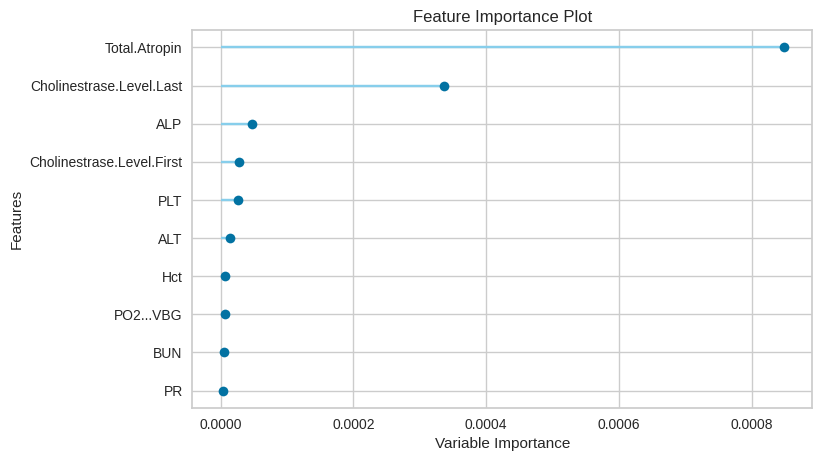

In [ ]:
plot_model(br, plot = 'feature')

## Create a Model

In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34666.6908,3.313438e+09,57562.4714,-0.0863,1.1586,1.4557
1,21743.9031,6.814836e+08,26105.2412,-0.1039,0.9953,1.5625
2,22425.9141,9.691476e+08,31131.1362,-0.0183,1.0224,1.5288
3,25060.8709,9.066578e+08,30110.7583,-0.0000,1.2713,2.3743
4,37240.7260,2.621651e+09,51202.0596,-0.2029,1.2916,1.9404
5,18629.1798,4.138154e+08,20342.4528,-3.1715,1.6591,4.9856
6,19856.9824,4.988748e+08,22335.5064,-0.0123,1.6670,5.7754
7,23292.7169,6.689833e+08,25864.7115,-0.0001,1.4877,4.0579
8,18086.6599,3.848112e+08,19616.6052,-0.0842,1.0203,1.6876


## Plot_model

In [ ]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(br, plot = 'confusion_matrix')

ValueError: ignored

In [ ]:
plot_model(estimator=br,plot = 'auc')

ValueError: ignored

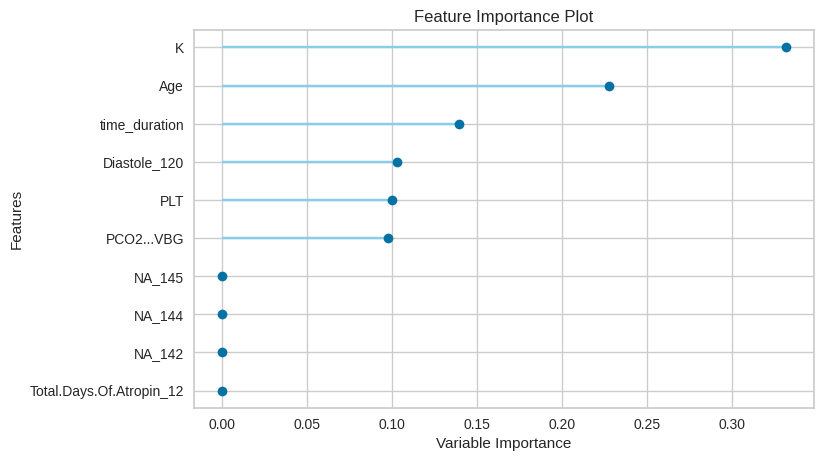

In [ ]:
plot_model(dt, plot = 'feature')

In [ ]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…